## Ejercicio 1

Busco $\theta$ que maximize $\prod_{k=1}^{n}p(\vec{x_{k}}|\vec{\theta})$

Derivando para cada $\theta_{i}$ por separado terminamos llegando a $\theta_{i} = (\sum_{k=1}^{n}x_{k,i})/n$

Osea que para cada i = 1,..,d el estimador por MV de $\theta_{i}$ es $(\sum_{k=1}^{n}x_{k,i})/n$, y por lo tanto $\vec{\hat\theta_{i}} = (\sum_{k=1}^{n}\vec{x_{i}})/n$

A continuacion subo foto ya que no me dio el tiempo para escribir todo el latex...



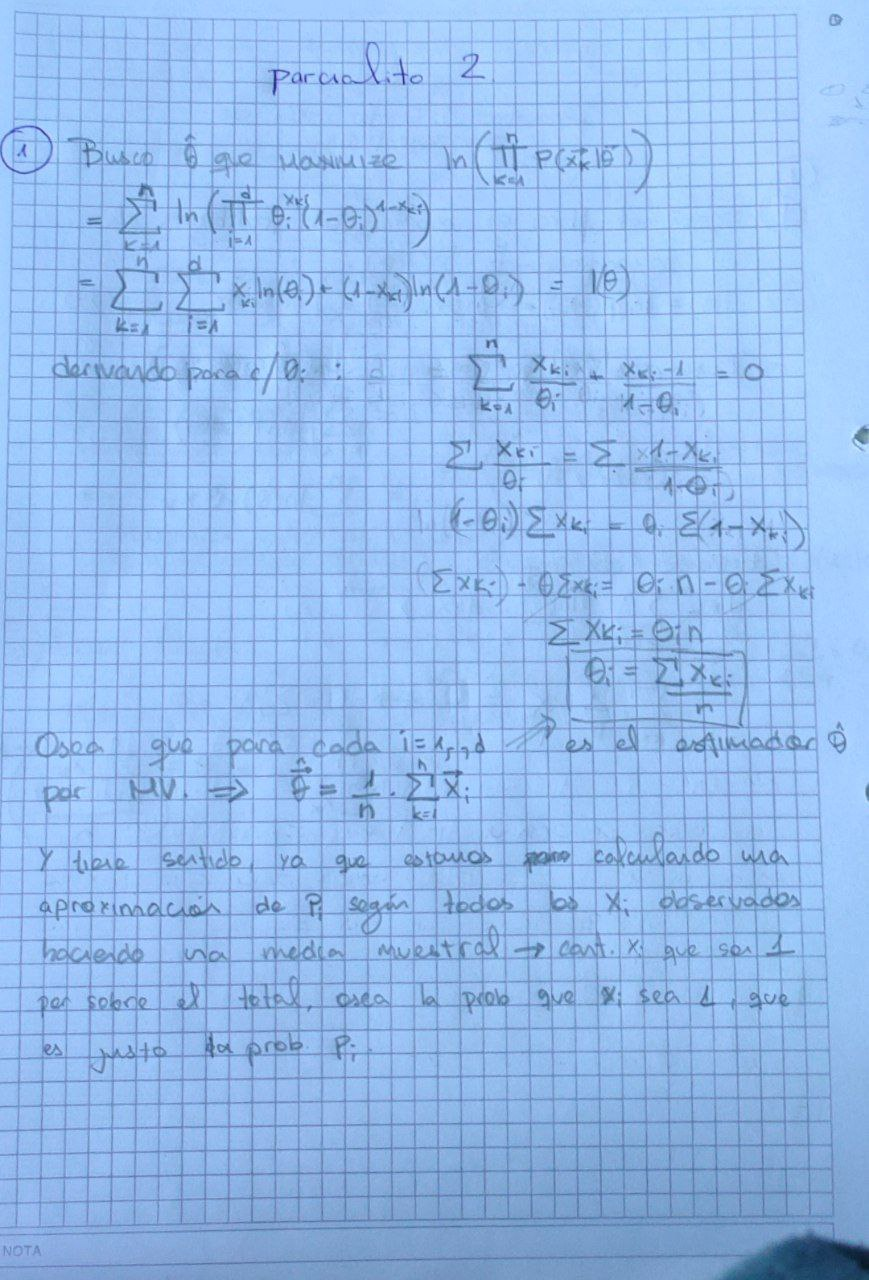

## Ejercicio 2

In [ ]:
import random
import numpy as np

d = 7
N = 1000

theta = [random.uniform(0, 1) for i in range(d)]

muestra = [[1 if random.random() < theta[j] else 0 for j in range(d)] for i in range(N)]

vec_suma = np.sum(muestra, axis=0)



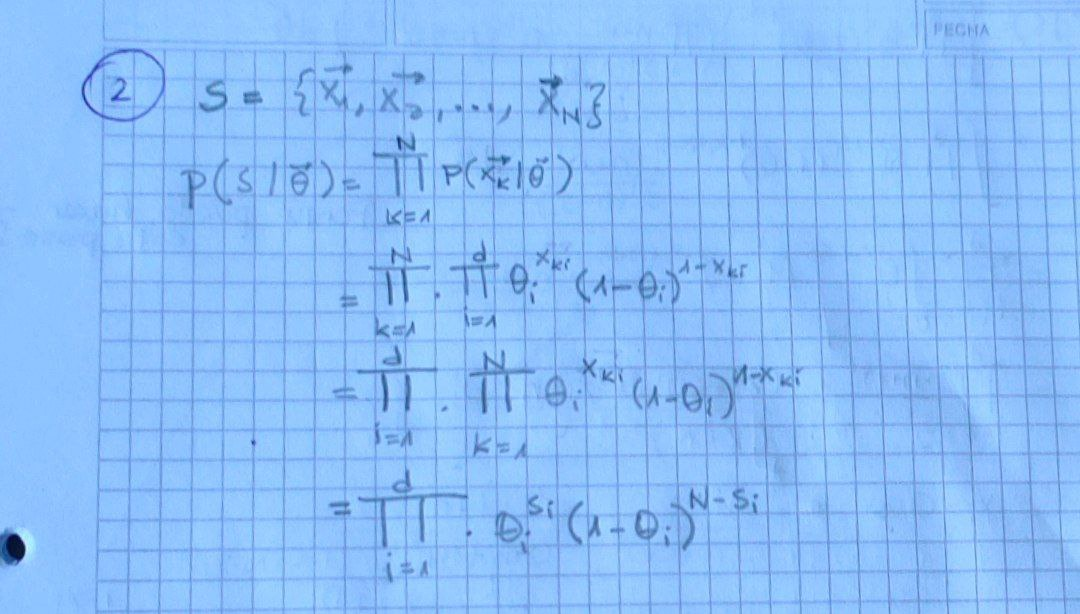

## Ejercicio 3


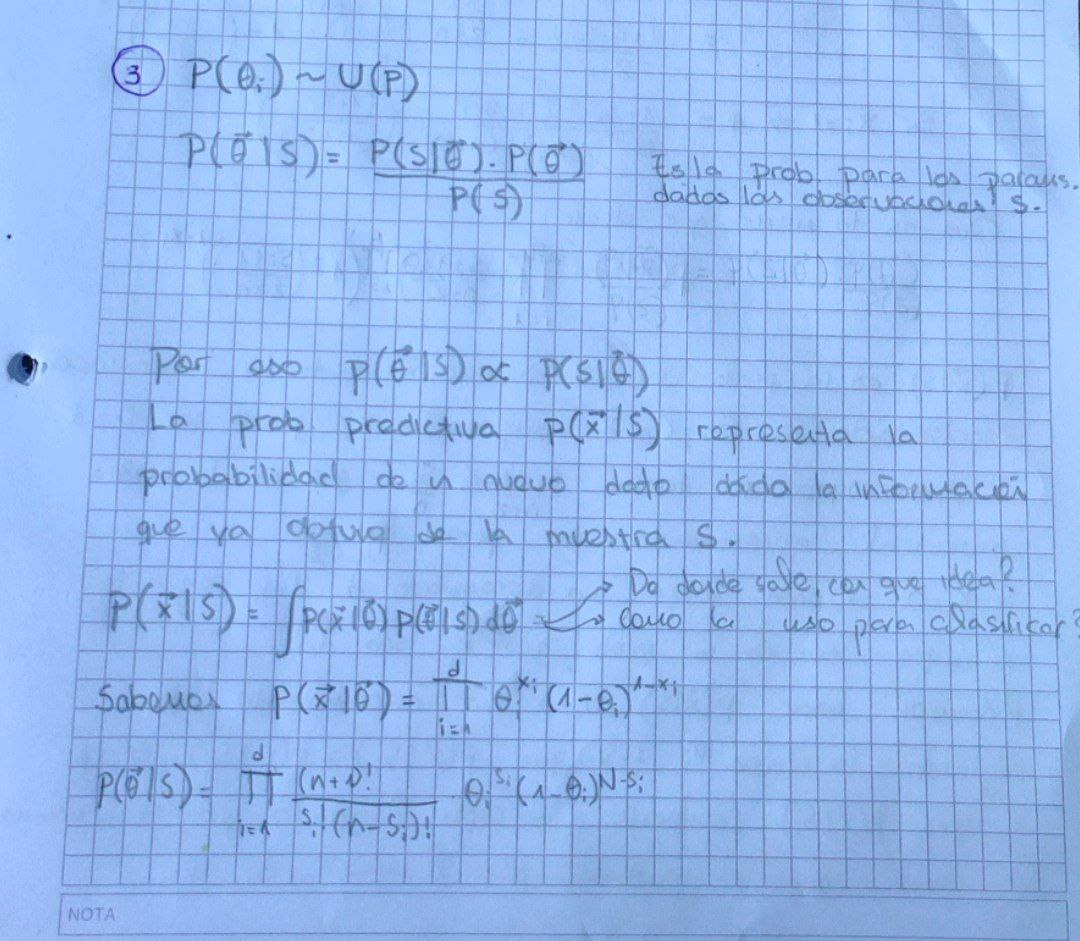

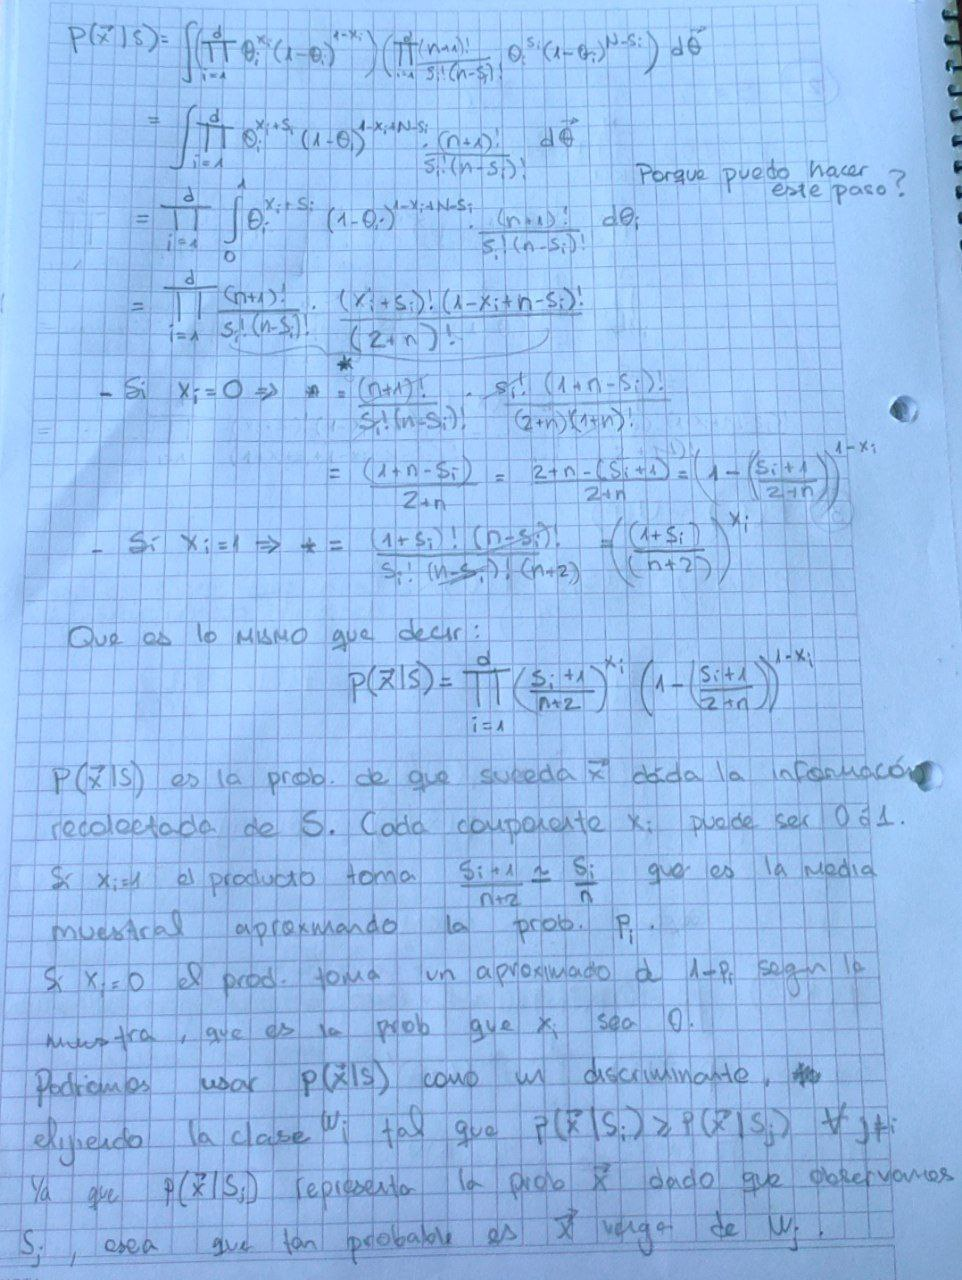

## Ejercicio 4

In [ ]:
# Palabras y sus θi bajo la hipótesis de SPAM, es decir, asumiendo que es spam cual es la probabilidad que aparezca esa palabra.

palabras = ["ganaste","premio","urgente","gratis","click","aqui","dinero","regalo","oferta","limitado","descuento","promocion","tarjeta","credito","cuenta","suscribete","felicidades","exclusivo","loteria","hazlo"]

theta_spam = np.array([
  0.9, 0.85, 0.7, 0.8, 0.75,
  0.7, 0.9, 0.8, 0.7, 0.6,
  0.7, 0.8, 0.6, 0.65, 0.7,
  0.8, 0.85, 0.6, 0.7, 0.9
])

theta_no_spam = np.array([
  0.1, 0.13, 0.3, 0.3, 0.2,
  0.2, 0.4, 0.23, 0.21, 0.5,
  0.1, 0.2, 0.4, 0.2, 0.2,
  0.3, 0.1, 0.3, 0.2, 0.4
])

#El correo es: ¡Felicidades! Ganaste un premio exclusivo. Haz click aquí para reclamar tu dinero.

#Palabras que aparecen: felicidades, ganaste, premio, exclusivo, click, aqui, dinero

# Vector binario para las palabras que aparecen en el correo
x = np.array([1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0])


Como ya tenemos un valor concreto de cada parametro, solo queda clasificar segun si es spam o no.

No tenemos informacion para estimar la probabilidad a priori, por lo que solo podemos usar la verosimilitud:

$ p(\vec{x} | \text{spam}) = \prod_{i=1}^{20}\theta_{i}^{x_{i}}*(1-\theta_{i})^{1-x_{i}} $

Podriamos decir que si dicha verosimilitud es mayor a determinada cota entonces la clasificamos como spam, o podriamos dar un vector de probabilidades de que cada palabra pertenezca al mail dado que es no spam (aunque el ejercicio no pide, hago lo ultimo).

Entonces la idea es clasificar SPAM si $p(\vec{x} | \text{spam}) > p(\vec{x} | \text{no spam})$, caso contrario clasifico NO SPAM

In [ ]:
# Calculo la verosimilitud

def verosimilitud(x, theta):
  ver = 1
  for i in range(len(x)):
    ver = ver * (theta[i]**x[i]) * ((1-theta[i])**(1-x[i]))
  return ver

print(verosimilitud(x, theta_spam)) # me da muy chico, porque puede ser ?

4.013725867199998e-09


In [ ]:
import re

def construir_vector(texto, pals):
  texto = texto.lower()
  texto = re.sub(r'[^\w\s]', '', texto)
  palabras_texto = set(texto.split())
  return np.array([1 if palabra in texto else 0 for palabra in pals])

texto_prueba = "¡Felicidades! Ganaste un premio exclusivo. Haz click aqui para reclamar tu dinero."

print(construir_vector(texto_prueba, palabras))


[1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0]


In [ ]:
def textver(texto, palabras, theta):
  x = construir_vector(texto, palabras)
  return verosimilitud(x, theta)

def clasificar(texto):
  ver_spam = textver(texto, palabras, theta_spam)
  ver_no_spam = textver(texto, palabras, theta_no_spam)
  print(ver_spam, ver_no_spam)
  if ver_spam > ver_no_spam:
    return 'SPAM'
  elif ver_spam < ver_no_spam:
    return 'NO SPAM'
  else:
    return 'NOSE ;)'

print(clasificar(texto_prueba))

4.013725867199998e-09 8.639159430021122e-08
NO SPAM
